# Importing the libraries 

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
!pip install ydata_profiling

In [53]:
!pip install pmdarima

In [54]:
import pmdarima as pm
from pmdarima import auto_arima

In [55]:
from ydata_profiling import ProfileReport

# Loading the dataset

In [56]:
sales = pd.read_csv("sales.csv")
products = pd.read_csv("products.csv")
stores = pd.read_csv("stores.csv")

# Data Profiling

In [57]:
sales_dataProfiling = ProfileReport(sales, title = "Sales Data Profiling")
sales_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
products_dataProfiling = ProfileReport(products, title = "Products Data Profiling")
products_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
stores_dataProfiling = ProfileReport(stores, title = "Stores Data Profiling")
stores_dataProfiling

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Dataset modification

In [60]:
#merging datasets
merged_df = pd.merge(pd.merge(sales, products, how = 'left'), stores, how ='left')

In [61]:
#checking the general overview of the merged dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829262 entries, 0 to 829261
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Sale_ID           829262 non-null  int64 
 1   Date              829262 non-null  object
 2   Store_ID          829262 non-null  int64 
 3   Product_ID        829262 non-null  int64 
 4   Units             829262 non-null  int64 
 5   Product_Name      829262 non-null  object
 6   Product_Category  829262 non-null  object
 7   Product_Cost      829262 non-null  object
 8   Product_Price     829262 non-null  object
 9   Store_Name        829262 non-null  object
 10  Store_City        829262 non-null  object
 11  Store_Location    829262 non-null  object
 12  Store_Open_Date   829262 non-null  object
dtypes: int64(4), object(9)
memory usage: 82.2+ MB


In [62]:
#replacing special characters in cost and price
merged_df['Product_Price'] = merged_df['Product_Price'].str.replace('[\$,]', '', regex=True)
merged_df['Product_Cost'] = merged_df['Product_Cost'].str.replace('[\$,]', '', regex=True)

In [63]:
#changing data types
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df['Product_Cost'] = pd.to_numeric(merged_df['Product_Cost'])
merged_df['Product_Price'] = pd.to_numeric(merged_df['Product_Price'])
merged_df['Store_Open_Date'] = pd.to_datetime(merged_df['Store_Open_Date'])

In [64]:
#adding new columns
merged_df['Sales'] = merged_df['Units'] * merged_df['Product_Price']
merged_df['Profit'] = merged_df['Sales'] - (merged_df['Units'] * merged_df['Product_Cost'])

# Exploratory data analysis

In [65]:
#find top 10 profitable products
top_10_products = merged_df.groupby('Product_Name')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False).head(10)
top_10_products

Product_Name    Profit
5         Colorbuds  834944.0
0     Action Figure  347748.0
17      Lego Bricks  298685.0
7     Deck Of Cards  252102.0
13    Glass Marbles  187590.0
2   Barrel O' Slime  183326.0
16  Kids Makeup Kit  146598.0
23         Nerf Gun  132715.0
6          Dart Gun  126352.0
10    Etch A Sketch  121680.0

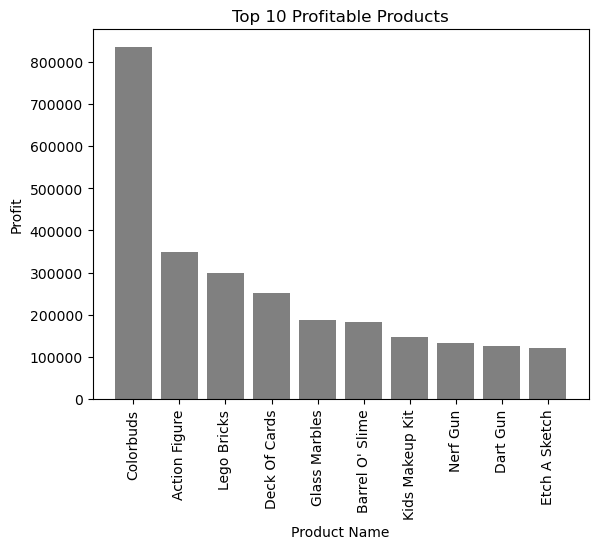

In [66]:
#plot the graph of top 10 profitable products
%matplotlib inline
plt.bar(top_10_products['Product_Name'], top_10_products['Profit'], color ='grey')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.title('Top 10 Profitable Products')
plt.xticks(rotation=90)
plt.show()

In [67]:
#find profitable product category
products_category = merged_df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
products_category

Product_Category     Profit
4               Toys  1079527.0
1        Electronics  1001437.0
0       Art & Crafts   753354.0
2              Games   673993.0
3  Sports & Outdoors   505718.0

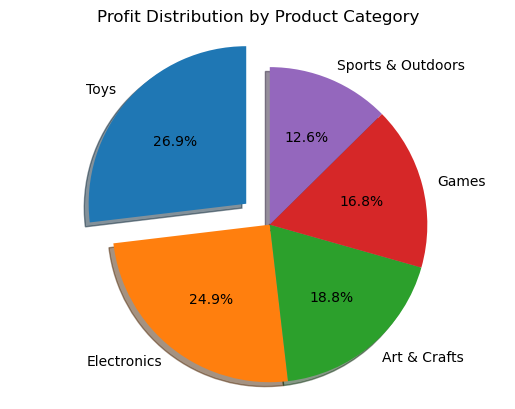

In [68]:
#plot the pie chart of profitable product category
plt.pie(products_category['Profit'], labels = products_category['Product_Category'], autopct='%1.1f%%', startangle=90, explode = [0.2,0,0,0,0], shadow = True)
plt.title('Profit Distribution by Product Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [69]:
#find 5 most revenue earned stores
top_5_stores_revenue = merged_df.groupby('Store_Name')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending = False).head(5)
top_5_stores_revenue

Store_Name      Sales
9   Maven Toys Ciudad de Mexico 2  554553.43
17       Maven Toys Guadalajara 3  449354.91
8   Maven Toys Ciudad de Mexico 1  433556.21
43            Maven Toys Toluca 1  411157.32
30         Maven Toys Monterrey 2  372998.82

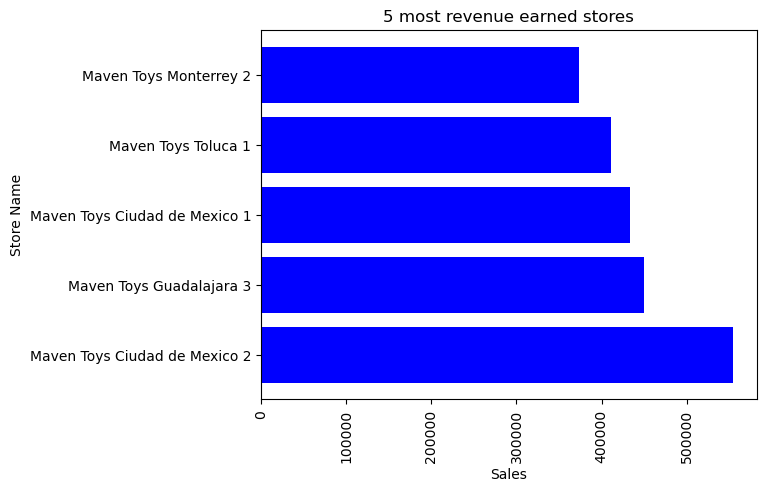

In [70]:
#plot horizontal bar graph of 5 most revenue earned stores
plt.barh(top_5_stores_revenue['Store_Name'], top_5_stores_revenue['Sales'], color ='blue')
plt.xlabel('Sales')
plt.ylabel('Store Name')
plt.title('5 most revenue earned stores')
plt.xticks(rotation=90)
plt.show()

In [71]:
#find 5 most profitable stores
top_5_stores_profit = merged_df.groupby('Store_Name')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False).head(5)
top_5_stores_profit

Store_Name    Profit
9   Maven Toys Ciudad de Mexico 2  169856.0
17       Maven Toys Guadalajara 3  121571.0
8   Maven Toys Ciudad de Mexico 1  111296.0
30         Maven Toys Monterrey 2  106783.0
43            Maven Toys Toluca 1  104612.0

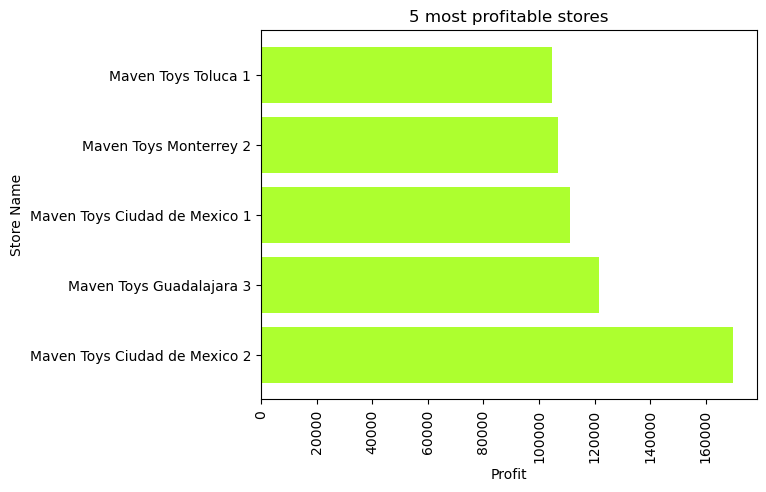

In [72]:
#plot horizontal bar graph of 5 most profitable stores
plt.barh(top_5_stores_profit['Store_Name'], top_5_stores_profit['Profit'], color ='greenyellow')
plt.xlabel('Profit')
plt.ylabel('Store Name')
plt.title('5 most profitable stores')
plt.xticks(rotation=90)
plt.show()

# Plotting the time series graph

In [73]:
#create a new data frame with Date and Sales by grouping with month
new_df = merged_df[['Date', 'Sales']].copy()
new_df['Year'] = new_df['Date'].dt.year
new_df['Month'] = new_df['Date'].dt.month

new_df = new_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
new_df['Year_Month'] = new_df['Year'].astype(str) + '-' + new_df['Month'].astype(str)
new_df.drop(['Year', 'Month'], axis=1, inplace=True)
new_df = new_df[['Year_Month', 'Sales']]
new_df

Year_Month      Sales
0      2017-1  542554.91
1      2017-2  541351.65
2      2017-3  589485.19
3      2017-4  681072.98
4      2017-5  672369.90
5      2017-6  661980.22
6      2017-7  556034.23
7      2017-8  489422.73
8      2017-9  585844.04
9     2017-10  623874.39
10    2017-11  661304.15
11    2017-12  877203.69
12     2018-1  747196.22
13     2018-2  722632.19
14     2018-3  883515.64
15     2018-4  827691.07
16     2018-5  825319.49
17     2018-6  808299.25
18     2018-7  828348.86
19     2018-8  660877.07
20     2018-9  658194.48

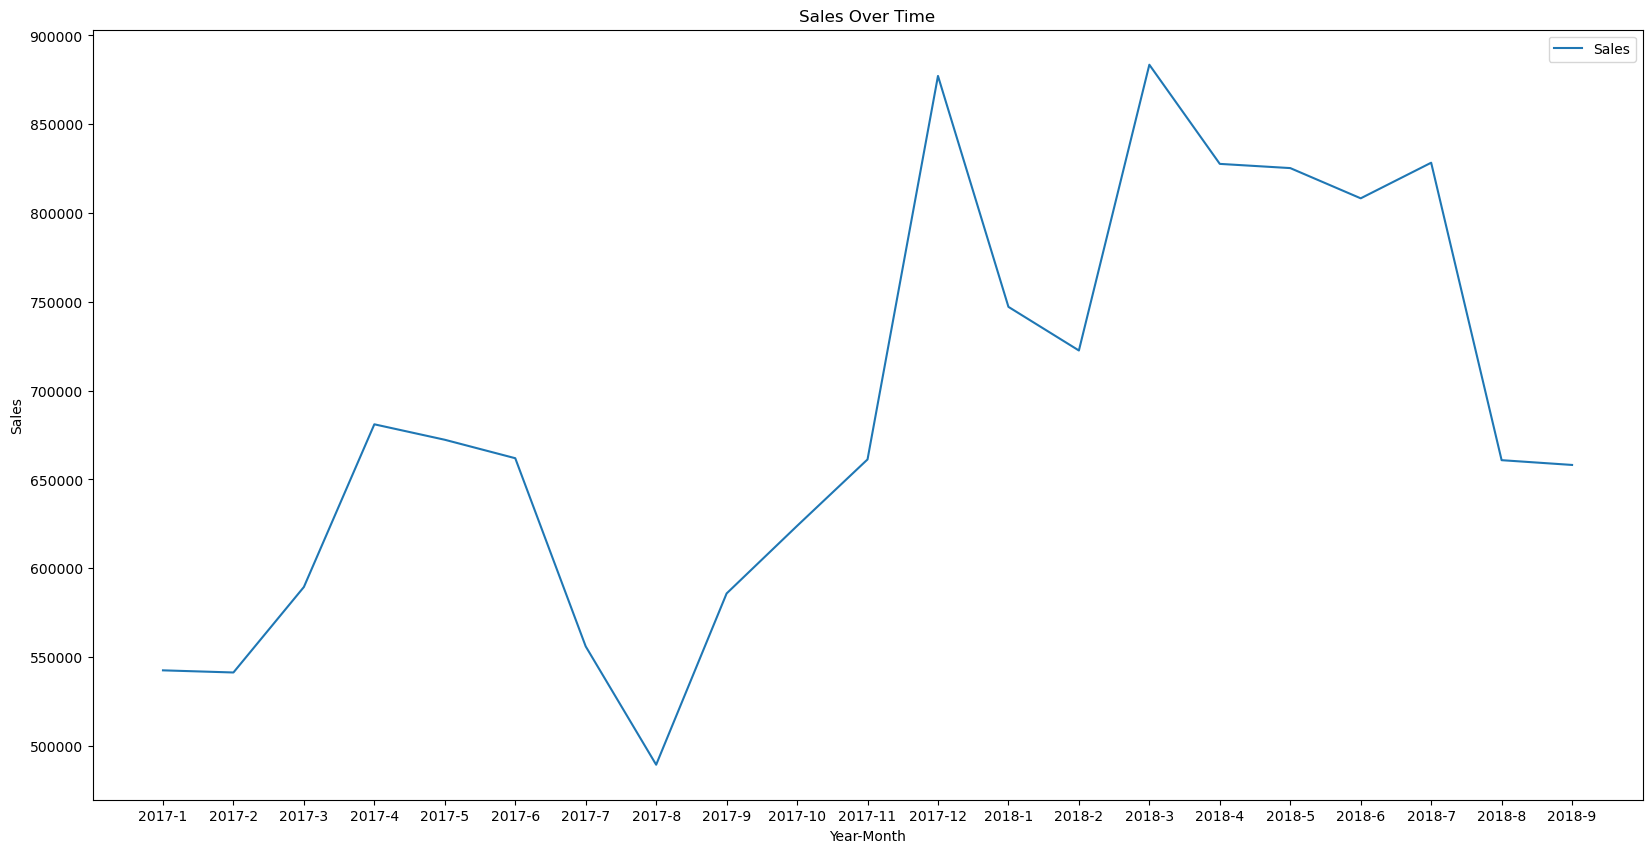

In [74]:
#plot the actual time series data
plt.figure(figsize=(20, 10))
plt.plot(new_df['Year_Month'], new_df['Sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Finding Trend, Seasonality, and Residuals

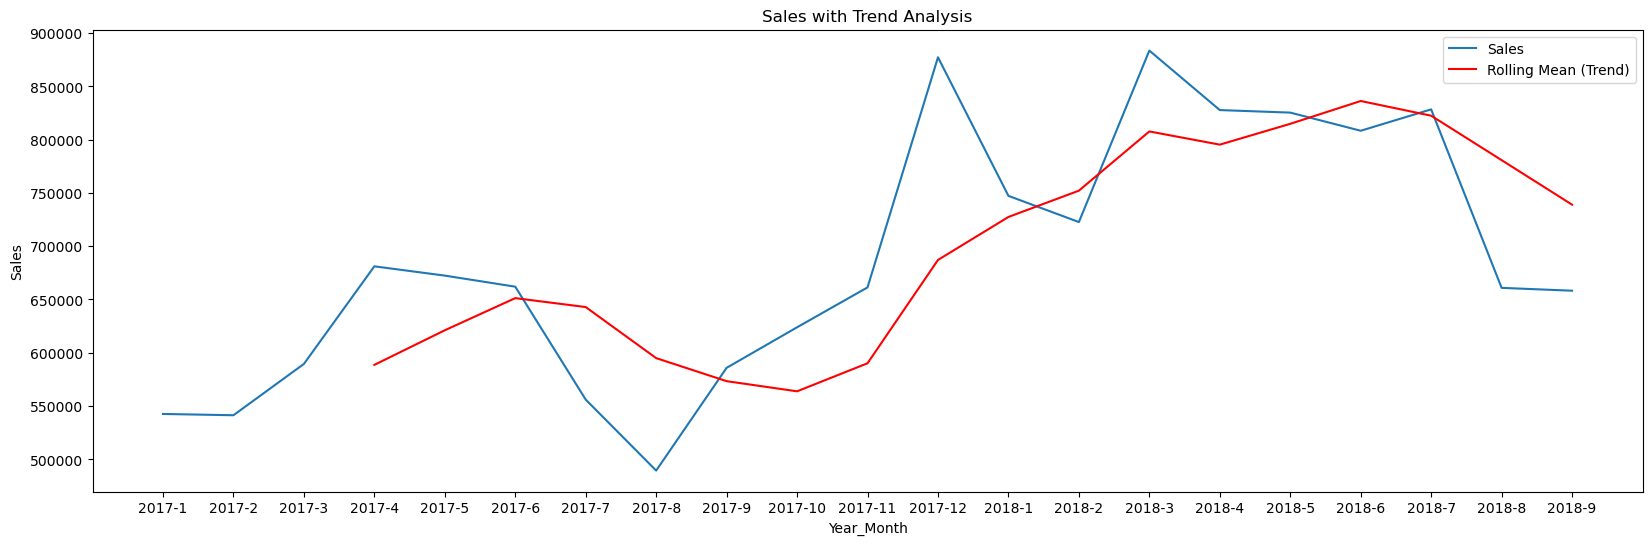

In [75]:
#plot rolling mean 
rolling_mean = new_df['Sales'].rolling(window=4).mean()
rolling_mean

plt.figure(figsize=(20, 6))
plt.plot(new_df['Year_Month'], new_df['Sales'], label='Sales')
plt.plot(rolling_mean, label='Rolling Mean (Trend)', color='red')
plt.title('Sales with Trend Analysis')
plt.xlabel('Year_Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Time series forecast of sales

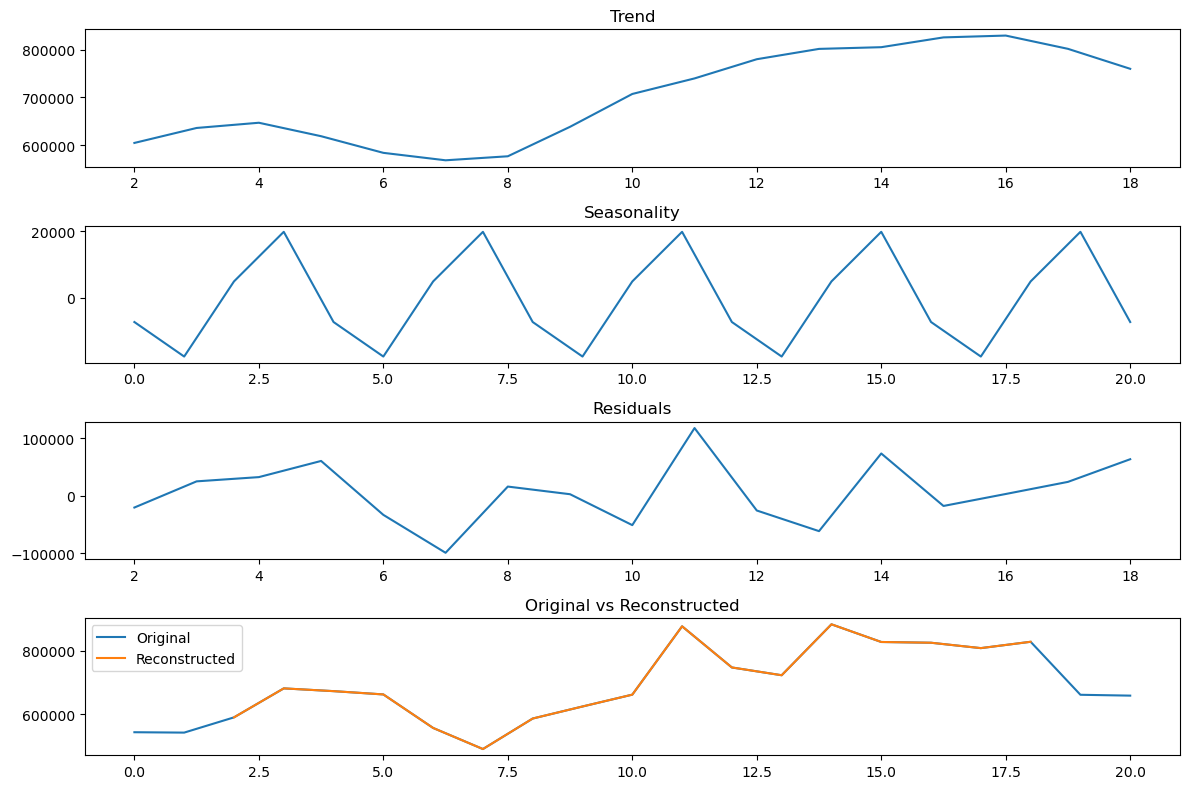

In [76]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(new_df['Sales'], model='additive', period=4)

# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [113]:
from statsmodels.tsa.stattools import adfuller

# Function to check stationarity
def test_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Check stationarity of the original sales data
test_stationarity(new_df['Sales'])

ADF Statistic: -2.0208297942051807
p-value: 0.2775152970111202
Critical Values: {'1%': -3.8092091249999998, '5%': -3.0216450000000004, '10%': -2.6507125}


ADF Statistic: -1.536834918680044
p-value: 0.5152173677361014
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


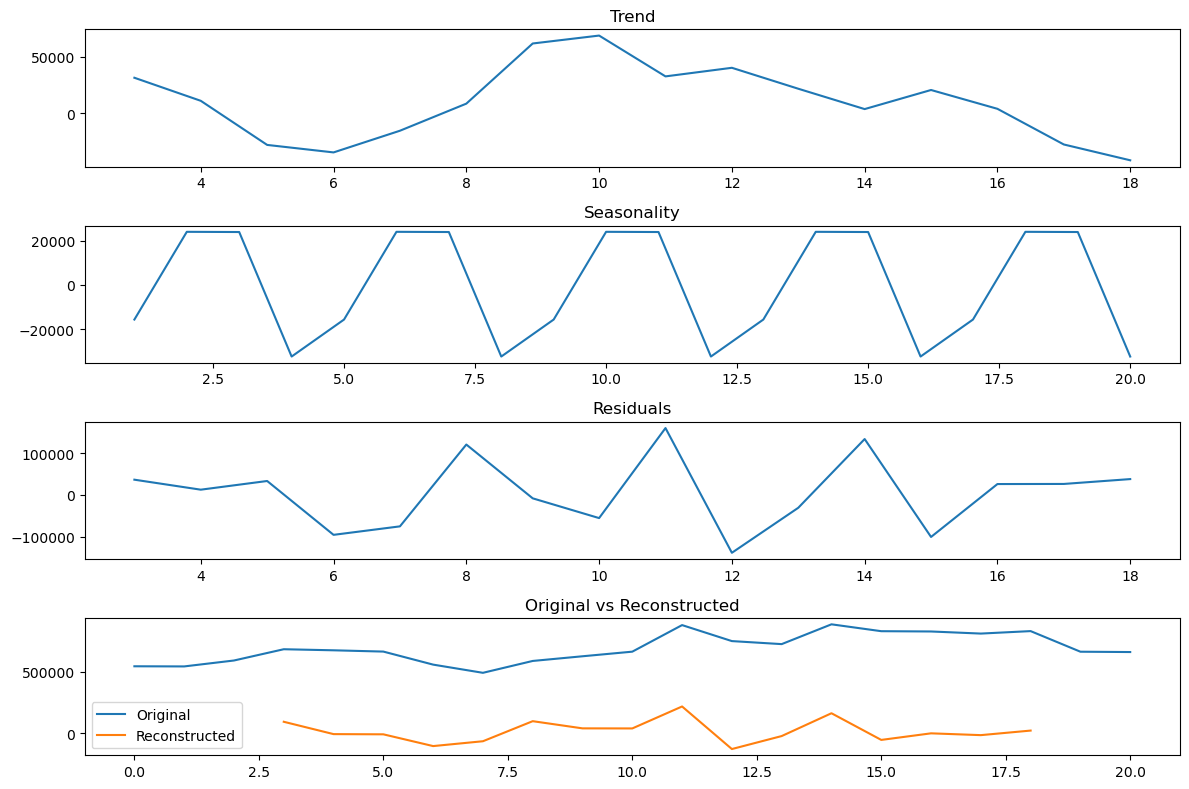

In [114]:
##Data is non-stationary
##Differencing the data and do seasonal decomposing again
# First-order differencing
new_df['Sales_diff'] = new_df['Sales'].diff(1)

# Check stationarity of the differenced series
test_stationarity(new_df['Sales_diff'].dropna())

# Decompose the differenced series
result_diff = seasonal_decompose(new_df['Sales_diff'].dropna(), model='additive', period=4)


# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result_diff.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result_diff.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result_diff.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result_diff.trend + result_diff.seasonal + result_diff.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

ADF Statistic: -2.3496870836190675
p-value: 0.15644301918108405
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}


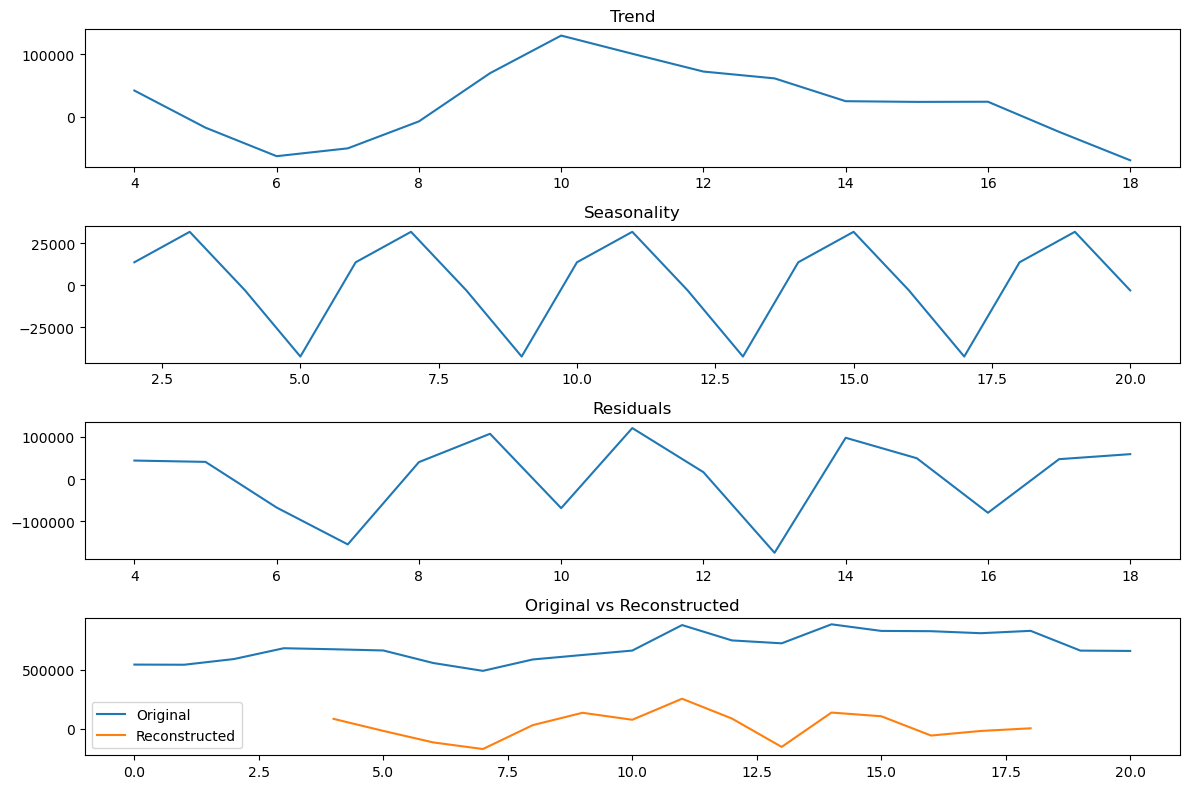

In [115]:
##Data is non-stationary
##Differencing the data and do seasonal decomposing again
# First-order differencing
new_df['Sales_diff'] = new_df['Sales'].diff(2)

# Check stationarity of the differenced series
test_stationarity(new_df['Sales_diff'].dropna())

# Decompose the differenced series
result_diff = seasonal_decompose(new_df['Sales_diff'].dropna(), model='additive', period=4)


# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result_diff.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result_diff.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result_diff.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result_diff.trend + result_diff.seasonal + result_diff.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

ADF Statistic: -1.6873367873447425
p-value: 0.43764847123940676
Critical Values: {'1%': -3.889265672705068, '5%': -3.0543579727254224, '10%': -2.66698384083045}


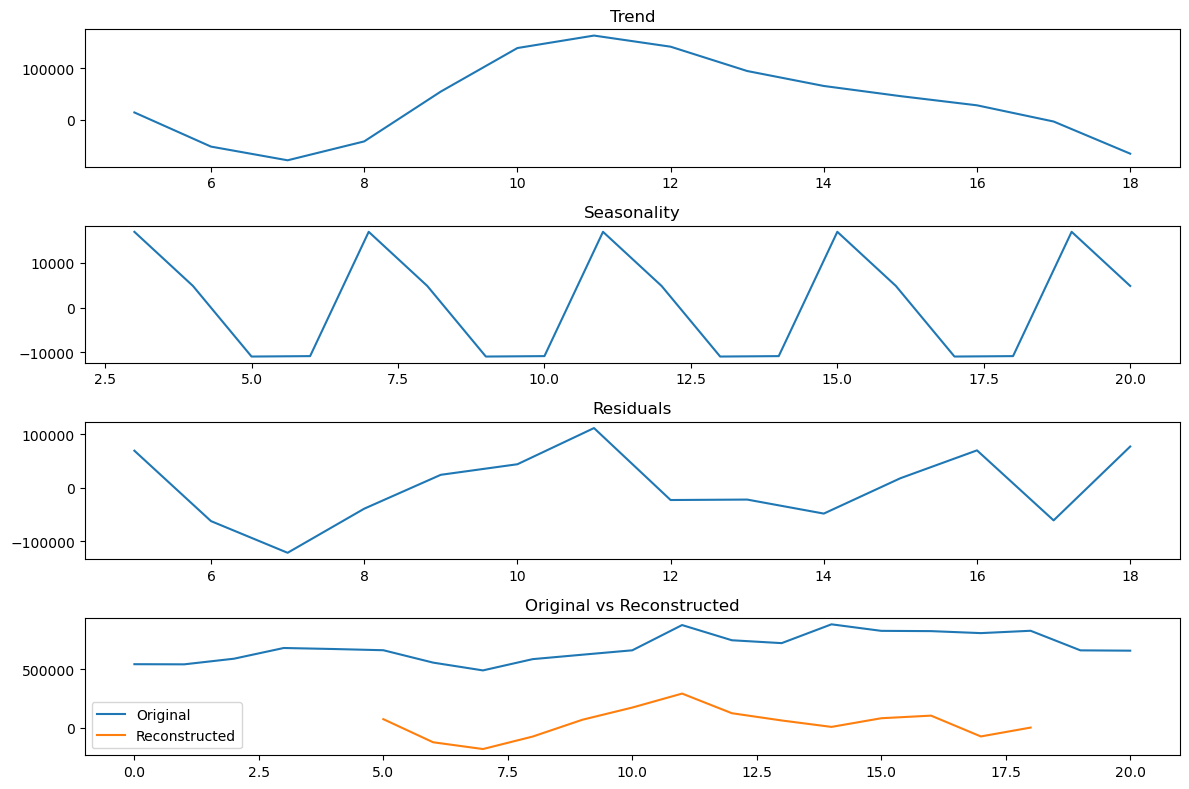

In [116]:
##Data is non-stationary
##Differencing the data and do seasonal decomposing again
# First-order differencing
new_df['Sales_diff'] = new_df['Sales'].diff(3)

# Check stationarity of the differenced series
test_stationarity(new_df['Sales_diff'].dropna())

# Decompose the differenced series
result_diff = seasonal_decompose(new_df['Sales_diff'].dropna(), model='additive', period=4)


# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result_diff.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result_diff.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result_diff.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result_diff.trend + result_diff.seasonal + result_diff.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

ADF Statistic: -1.9466211964594367
p-value: 0.3104566276461197
Critical Values: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}


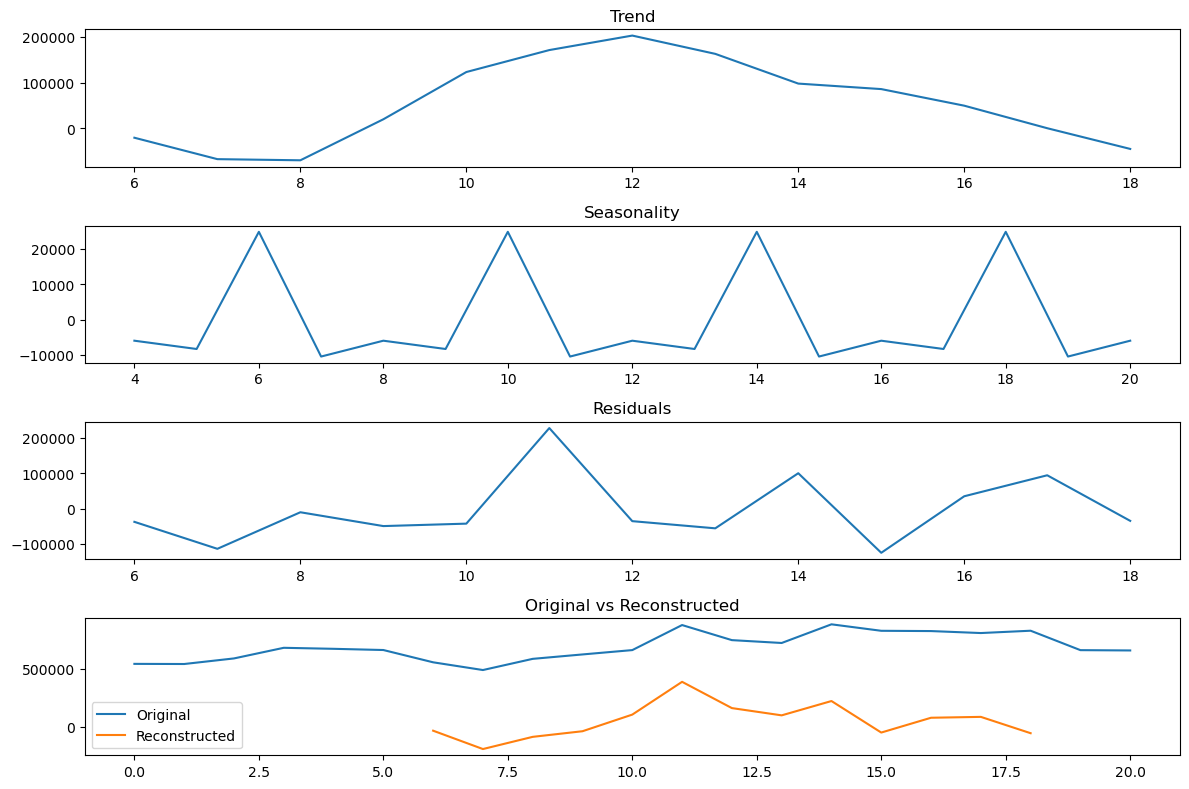

In [117]:
##Data is non-stationary
##Differencing the data and do seasonal decomposing again
# First-order differencing
new_df['Sales_diff'] = new_df['Sales'].diff(4)

# Check stationarity of the differenced series
test_stationarity(new_df['Sales_diff'].dropna())

# Decompose the differenced series
result_diff = seasonal_decompose(new_df['Sales_diff'].dropna(), model='additive', period=4)


# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result_diff.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result_diff.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result_diff.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result_diff.trend + result_diff.seasonal + result_diff.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

ADF Statistic: -0.9973936572804614
p-value: 0.7542137173839277
Critical Values: {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}


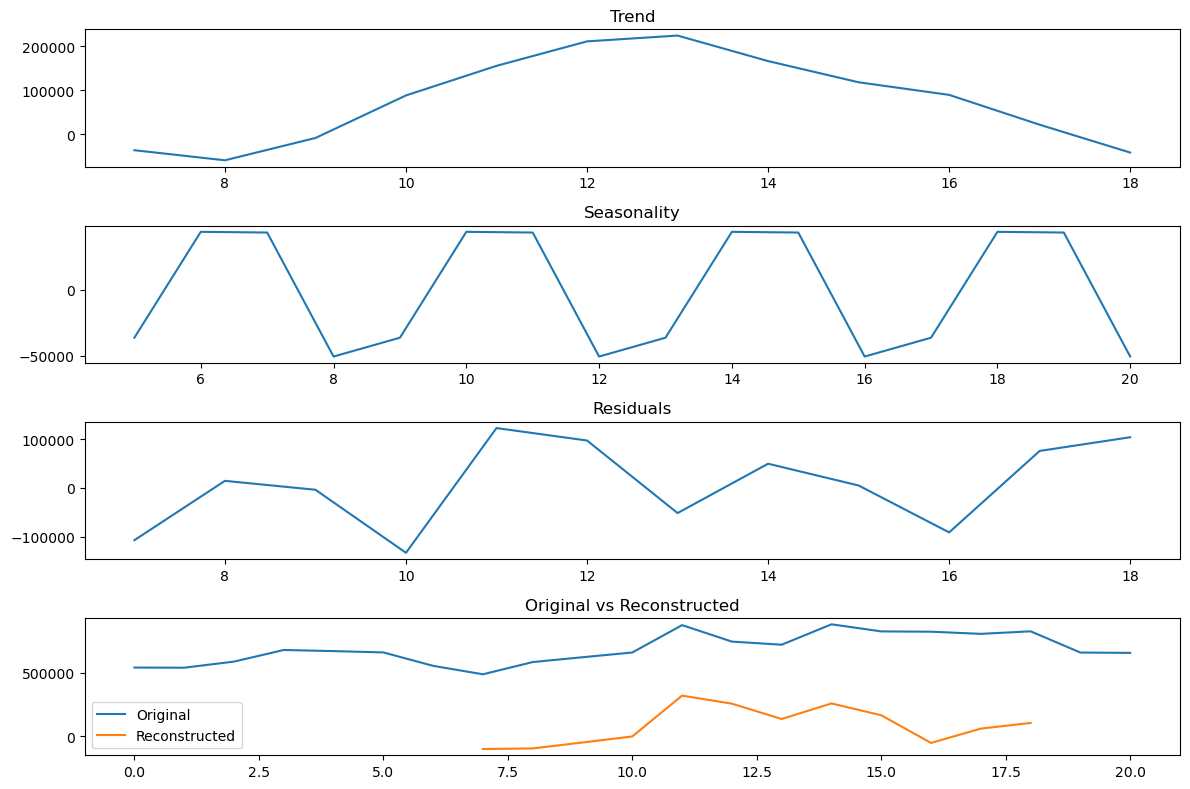

In [118]:
##Data is non-stationary
##Differencing the data and do seasonal decomposing again
# First-order differencing
new_df['Sales_diff'] = new_df['Sales'].diff(5)

# Check stationarity of the differenced series
test_stationarity(new_df['Sales_diff'].dropna())

# Decompose the differenced series
result_diff = seasonal_decompose(new_df['Sales_diff'].dropna(), model='additive', period=4)


# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result_diff.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result_diff.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result_diff.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result_diff.trend + result_diff.seasonal + result_diff.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

ADF Statistic: -13.955973786086963
p-value: 4.6108093672125324e-26
Critical Values: {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}


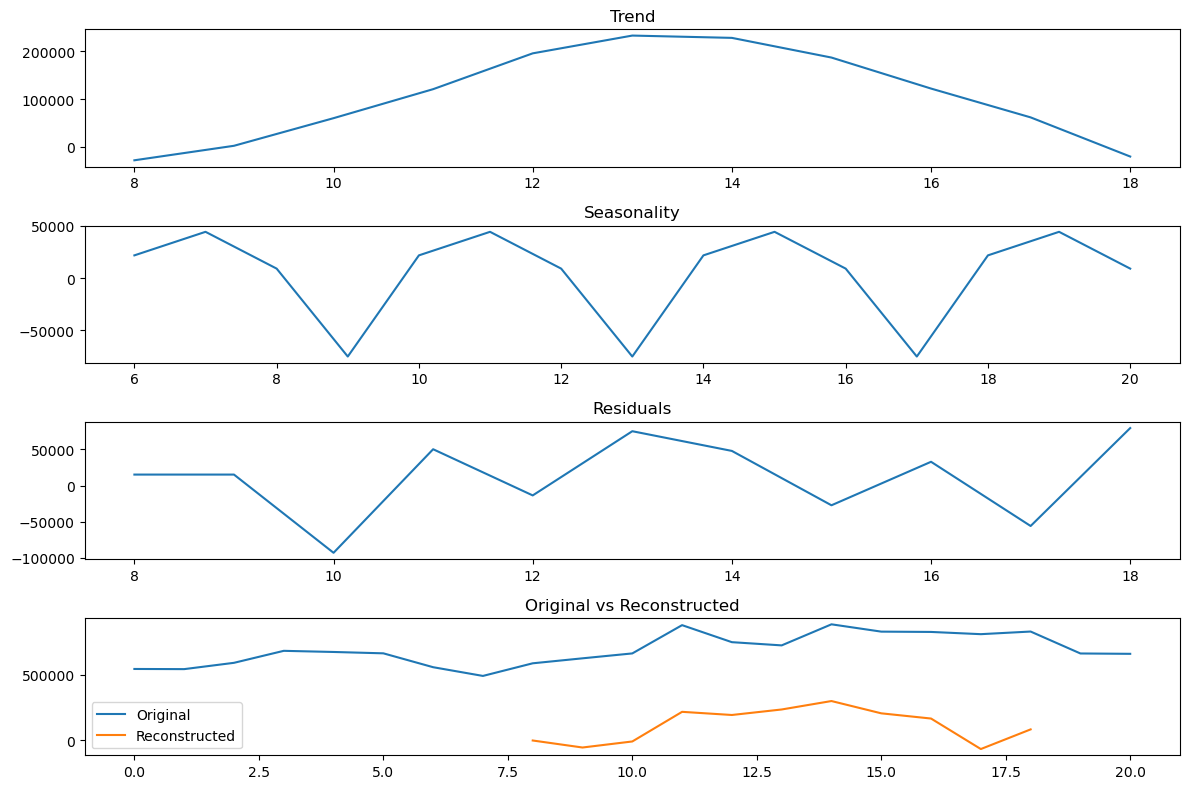

In [119]:
##Data is non-stationary
##Differencing the data and do seasonal decomposing again
# First-order differencing
new_df['Sales_diff'] = new_df['Sales'].diff(6)

# Check stationarity of the differenced series
test_stationarity(new_df['Sales_diff'].dropna())

# Decompose the differenced series
result_diff = seasonal_decompose(new_df['Sales_diff'].dropna(), model='additive', period=4)


# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result_diff.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result_diff.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result_diff.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df['Sales'], label='Original')
plt.plot(result_diff.trend + result_diff.seasonal + result_diff.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [126]:
# Fit an auto ARIMA model
model = auto_arima(new_df['Sales'], seasonal=True, m=12, trace=True)
print(model.summary())

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (9) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,1,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=228.706, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=232.366, Time=0.06 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=232.913, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=251.011, Time=0.02 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=230.697, Time=0.06 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=230.687, Time=0.02 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=231.965, Time=0.24 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=232.245, Time=0.03 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=231.591, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,1,0)[12] intercept
Total fit time: 0.856 seconds
                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   21


In [78]:
#split the dataset into train data and test data
train_size = int(len(new_df) * 0.8)  # 80% for training, 20% for testing
train, test = new_df[:train_size], new_df[train_size:]

In [79]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


order = (0, 1, 0)  # Non-seasonal orders
seasonal_order = (0, 1, 0, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model = SARIMAX(train['Sales'], order=order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

In [80]:
# Forecast future values on the test set
forecast_steps = len(test)
forecast_results = sarima_fit.get_forecast(steps=forecast_steps)
forecast_values = forecast_results.predicted_mean
forecast_values

16    818987.99
17    808598.31
18    702652.32
19    636040.82
20    732462.13
Name: predicted_mean, dtype: float64

In [81]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(test['Sales'], forecast_values)
print('Mean Squared Error:', mse)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Sales'], forecast_values)
print('Mean Absolute Error:', mae)

Mean Squared Error: 4394464129.538042
Mean Absolute Error: 46286.2


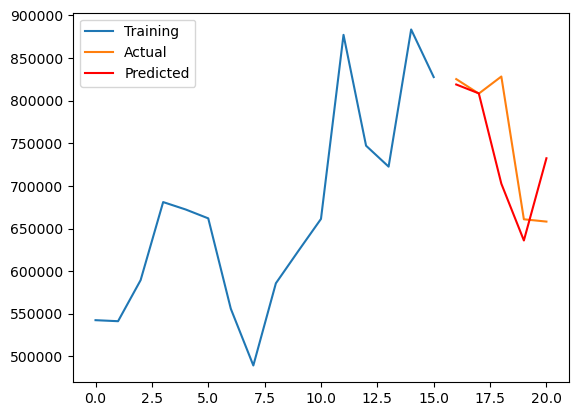

In [82]:
# Plot the original data, predicted values, and confidence intervals
plt.plot(train.index, train['Sales'], label='Training')
plt.plot(test.index, test['Sales'], label='Actual')
plt.plot(forecast_values.index, forecast_values, label='Predicted', color='red')
plt.legend()
plt.show()

In [83]:
#create a new data frame with Date and Profit by grouping with month
new_df1 = merged_df[['Date', 'Profit']].copy()
new_df1['Year'] = new_df1['Date'].dt.year
new_df1['Month'] = new_df1['Date'].dt.month

In [84]:
new_df1 = new_df1.groupby(['Year', 'Month'])['Profit'].sum().reset_index()
new_df1['Year_Month'] = new_df1['Year'].astype(str) + '-' + new_df1['Month'].astype(str)
new_df1.drop(['Year', 'Month'], axis=1, inplace=True)
new_df1 = new_df1[['Year_Month', 'Profit']]
new_df1

Year_Month    Profit
0      2017-1  167126.0
1      2017-2  161861.0
2      2017-3  173992.0
3      2017-4  190099.0
4      2017-5  186894.0
5      2017-6  189815.0
6      2017-7  176922.0
7      2017-8  158931.0
8      2017-9  166397.0
9     2017-10  178799.0
10    2017-11  192873.0
11    2017-12  246078.0
12     2018-1  205074.0
13     2018-2  189314.0
14     2018-3  231909.0
15     2018-4  215096.0
16     2018-5  210347.0
17     2018-6  207212.0
18     2018-7  209807.0
19     2018-8  175038.0
20     2018-9  180445.0

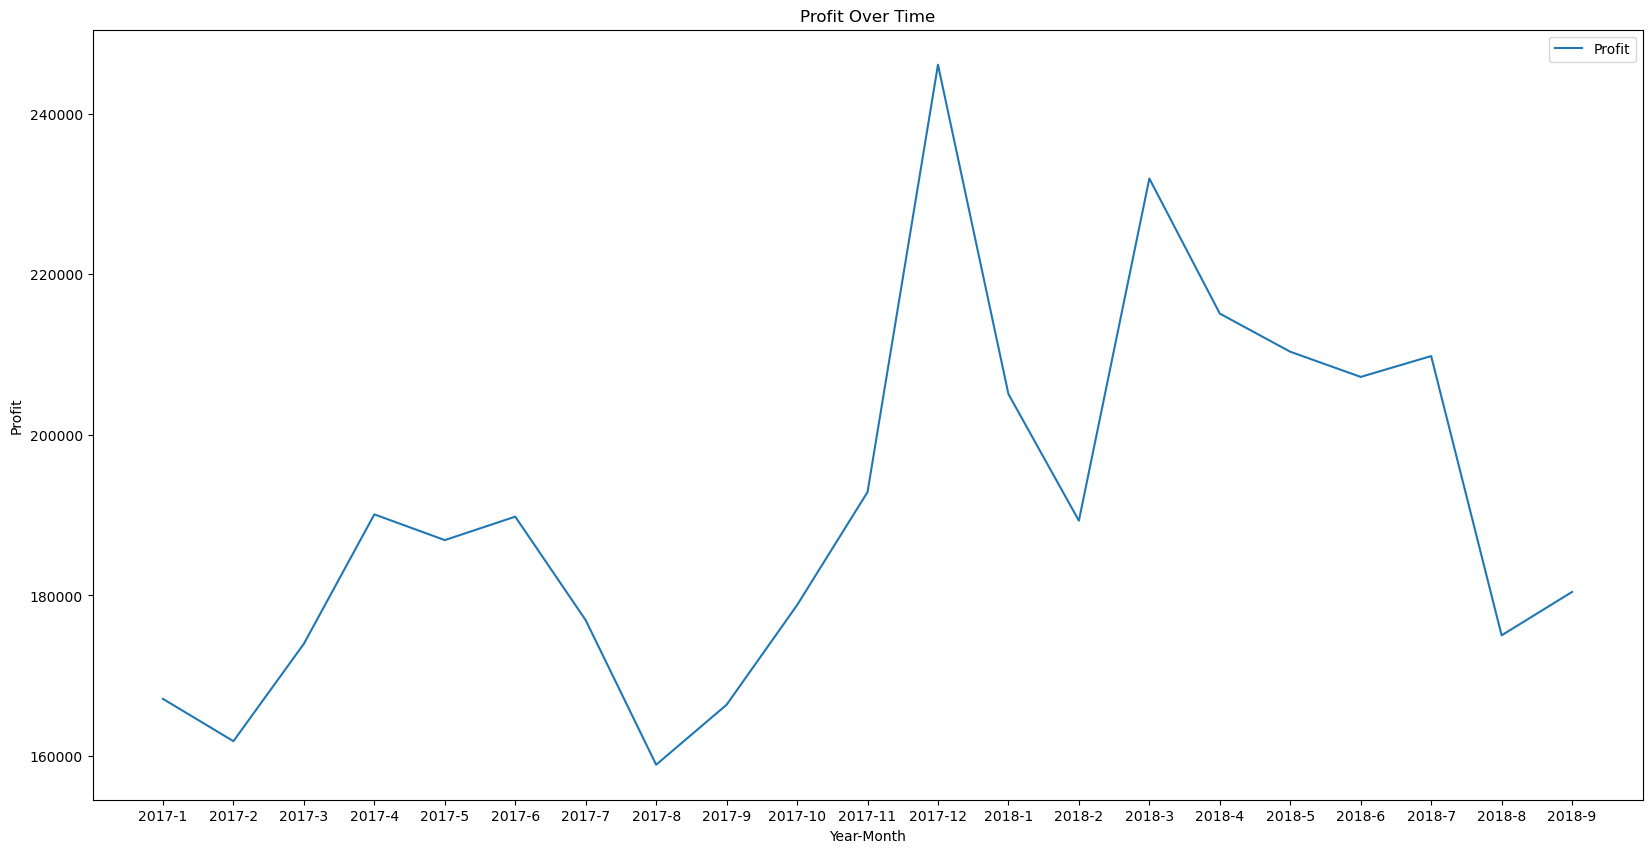

In [85]:
#plot the actual time series data
plt.figure(figsize=(20, 10))
plt.plot(new_df1['Year_Month'], new_df1['Profit'], label='Profit')
plt.title('Profit Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Profit')
plt.legend()
plt.show()

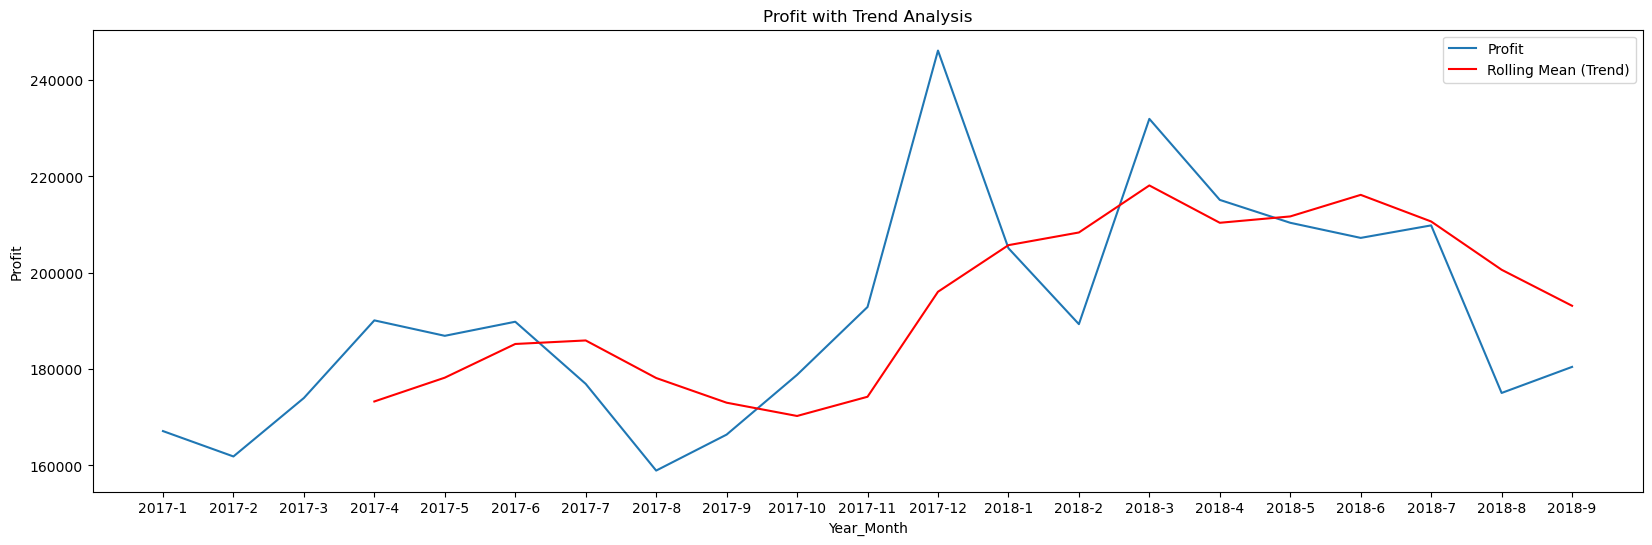

In [86]:
#plot rolling mean 
rolling_mean = new_df1['Profit'].rolling(window=4).mean()
rolling_mean

plt.figure(figsize=(20, 6))
plt.plot(new_df1['Year_Month'], new_df1['Profit'], label='Profit')
plt.plot(rolling_mean, label='Rolling Mean (Trend)', color='red')
plt.title('Profit with Trend Analysis')
plt.xlabel('Year_Month')
plt.ylabel('Profit')
plt.legend()
plt.show()

In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Decompose the time series into trend, seasonality, and residual
result = seasonal_decompose(new_df1['Profit'], model='additive', period=4)

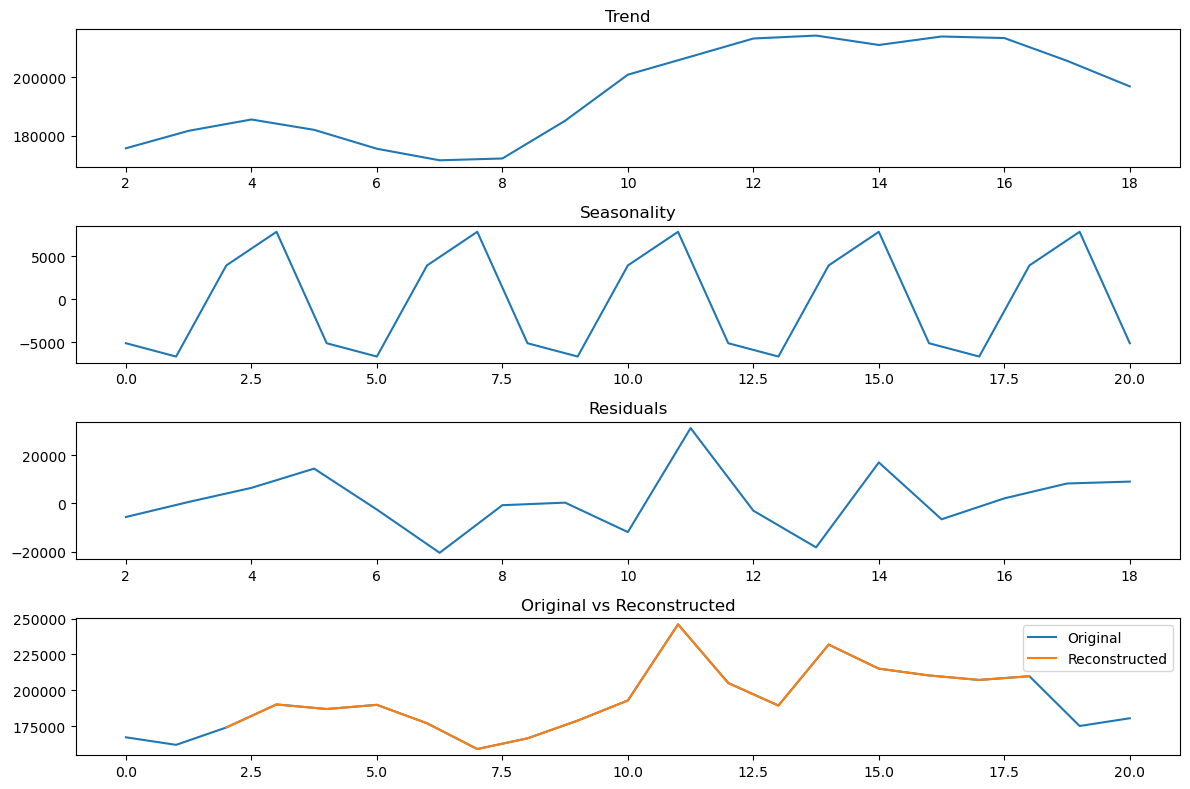

In [104]:
# Plot the components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(result.trend)
plt.title('Trend')

plt.subplot(4, 1, 2)
plt.plot(result.seasonal)
plt.title('Seasonality')

plt.subplot(4, 1, 3)
plt.plot(result.resid)
plt.title('Residuals')

plt.subplot(4, 1, 4)
plt.plot(new_df1['Profit'], label='Original')
plt.plot(result.trend + result.seasonal + result.resid, label='Reconstructed')
plt.title('Original vs Reconstructed')
plt.legend()

plt.tight_layout()
plt.show()

In [105]:
# Fit an auto ARIMA model
model1 = auto_arima(new_df1['Profit'], seasonal=True, m=12, trace=True)
print(model1.summary())

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (9) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


Performing stepwise search to minimize aic


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=16.000, Time=0.30 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=199.903, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=203.279, Time=0.05 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=212.661, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=214.394, Time=0.01 sec


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=14.000, Time=0.24 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=12.000, Time=0.11 sec


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=14.000, Time=0.19 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=10.000, Time=0.08 sec


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,2)(1,1,0)[12] intercept   : AIC=12.000, Time=0.16 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=12.000, Time=0.17 sec


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=14.000, Time=0.25 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=8.000, Time=0.09 sec


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,2)(1,1,0)[12] intercept   : AIC=10.000, Time=0.14 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=10.000, Time=0.19 sec


C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,2)(1,1,1)[12] intercept   : AIC=12.000, Time=0.21 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=214.844, Time=0.04 sec
 ARIMA(0,0,3)(0,1,0)[12] intercept   : AIC=212.982, Time=0.07 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=212.081, Time=0.06 sec
 ARIMA(1,0,3)(0,1,0)[12] intercept   : AIC=201.004, Time=0.15 sec
 ARIMA(0,0,2)(0,1,0)[12]             : AIC=213.061, Time=0.13 sec

Best model:  ARIMA(0,0,2)(0,1,0)[12] intercept
Total fit time: 2.725 seconds
                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   21
Model:             SARIMAX(0, 0, 2)x(0, 1, [], 12)   Log Likelihood                   0.000
Date:                             Wed, 01 May 2024   AIC                              8.000
Time:                                     04:05:19   BIC                              8.789
Sample:                                          0   HQIC          

C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: divide by zero encountered in divide
  return self.params / self.bse
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py:3015: RuntimeWarning: invalid value encountered in divide
  return self.params / self.bse
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1363: RuntimeWarning: invalid value encountered in divide
  test_statistic = numer_squared_sum / denom_squared_sum
C:\Users\ammra\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:691: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]


In [109]:
#split the dataset into train data and test data
train_size1 = int(len(new_df1) * 0.8)  # 80% for training, 20% for testing
train1, test1 = new_df1[:train_size1], new_df1[train_size1:]

from statsmodels.tsa.statespace.sarimax import SARIMAX


order1 = (0, 1, 0)  # Non-seasonal orders
seasonal_order1 = (0, 1, 0, 12)  # Seasonal orders

# Fit SARIMA model on the training data
sarima_model1 = SARIMAX(train1['Profit'], order=order1, seasonal_order=seasonal_order1)
sarima_fit1 = sarima_model1.fit()


In [110]:
# Forecast future values on the test set
forecast_steps1 = len(test1)
forecast_results1 = sarima_fit1.get_forecast(steps=forecast_steps1)
forecast_values1 = forecast_results1.predicted_mean
forecast_values1

16    211891.0
17    214812.0
18    201919.0
19    183928.0
20    191394.0
Name: predicted_mean, dtype: float64

In [111]:
from sklearn.metrics import mean_squared_error

#calculate Mean Squared Error (MSE) as a measure of accuracy
mse1 = mean_squared_error(test1['Profit'], forecast_values1)
print('Mean Squared Error:', mse1)

#calculate Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

mae1 = mean_absolute_error(test1['Profit'], forecast_values1)
print('Mean Absolute Error:', mae1)

Mean Squared Error: 64255436.2
Mean Absolute Error: 7374.2


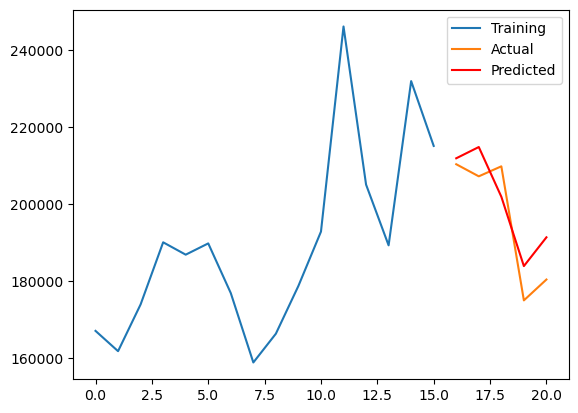

In [112]:
# Plot the original data, predicted values, and confidence intervals
plt.plot(train1.index, train1['Profit'], label='Training')
plt.plot(test1.index, test1['Profit'], label='Actual')
plt.plot(forecast_values1.index, forecast_values1, label='Predicted', color='red')
plt.legend()
plt.show()

In [138]:
product_category = merged_df[['Date','Product_Category','Profit']].copy()
product_category['Year'] = product_category['Date'].dt.year
product_category['Month'] = product_category['Date'].dt.month
product_category['Year_Month'] = product_category['Year'].astype(str) + '-' + product_category['Month'].astype(str)
product_category.drop(['Year', 'Month'], axis=1, inplace=True)
product_category = product_category[['Year_Month', 'Product_Category', 'Profit']]
product_category

Year_Month   Product_Category  Profit
0          2017-1              Games     3.0
1          2017-1               Toys     6.0
2          2017-1              Games     3.0
3          2017-1  Sports & Outdoors     4.0
4          2017-1               Toys     5.0
...           ...                ...     ...
829257     2018-9       Art & Crafts     2.0
829258     2018-9              Games     4.0
829259     2018-9       Art & Crafts     2.0
829260     2018-9               Toys     6.0
829261     2018-9        Electronics     8.0

[829262 rows x 3 columns]

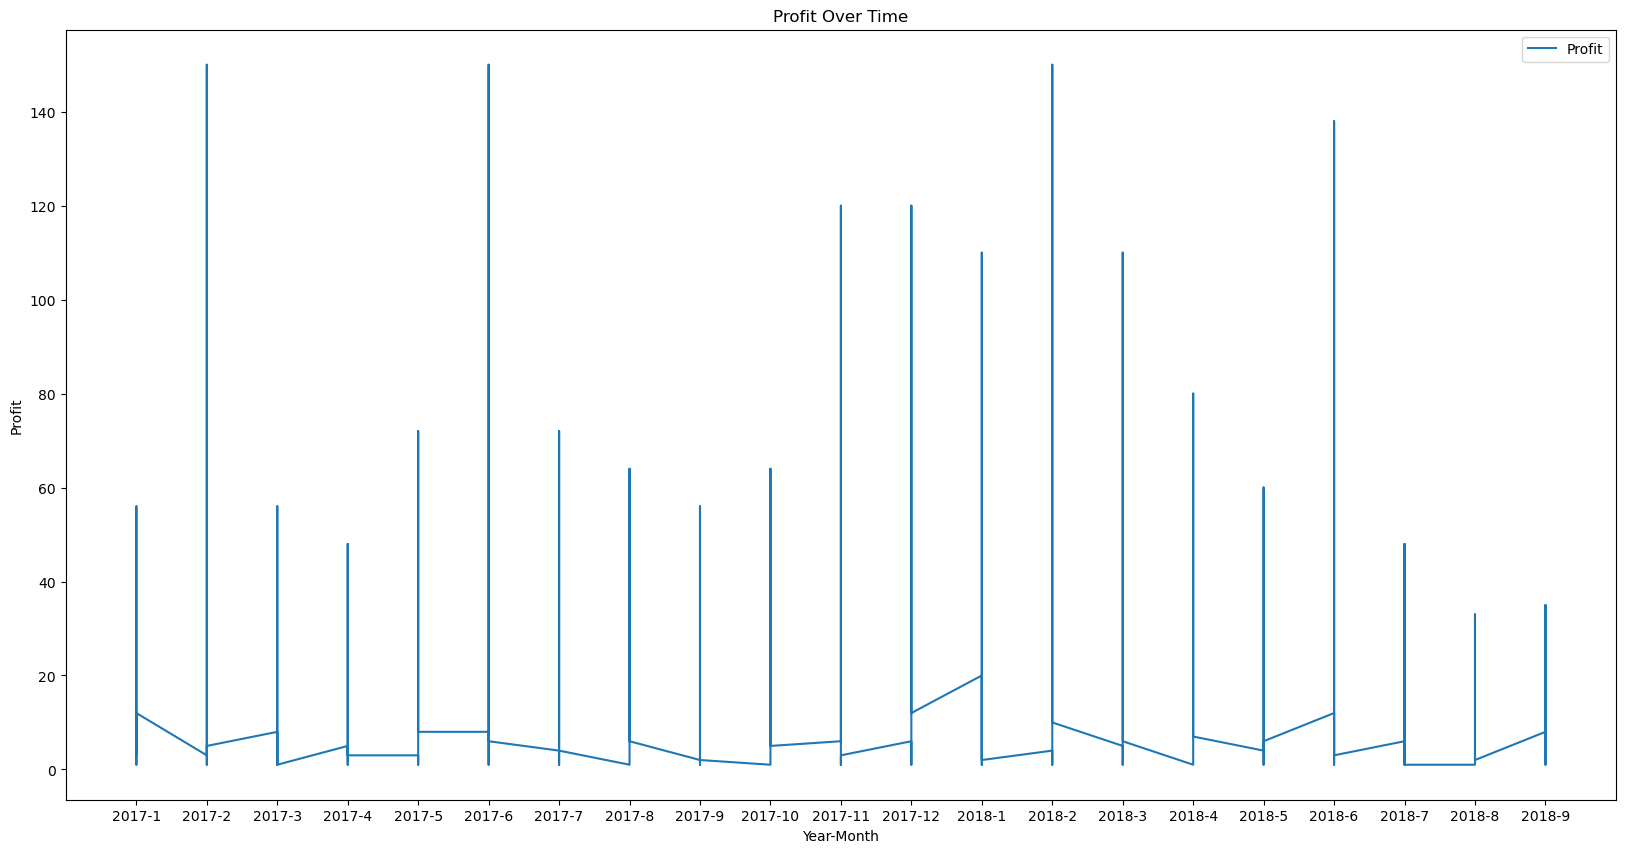

In [132]:
#plot the actual time series data
plt.figure(figsize=(20, 10))
plt.plot(product_category['Year_Month'], product_category['Profit'], label='Profit')
plt.title('Profit Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Profit')
plt.legend()
plt.show()